### Testing Hyperbolic Discounting

I implement hyperbolic discounting by modyfing the `solveOneCycle` function in `core.py`. If a `geometric_solution` attribute is specified, the `solveOneCycle` function uses the solutions specified in this attribute list in its backward induction loop, instead of the current solution. The exponential discount factor is also resized by a factor of the `hyperbolic` discount variable. 

In [1]:
import numpy as np
from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType
from HARK.utilities import plotFuncsDer, plotFuncs

from copy import copy, deepcopy
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

We want to test if this implementation of HARK for hyperbolic agents is accurate. We check the results using a simple 3 period consumption model with Perfect Foresight, for which we have simple algebraic solutions we can use to corroborate our results. The consumption functions have a linear closed form expression, outlined in `quasi_hyperbolic_algebra.pdf`. The slope of the consumption functions are functions of $\beta$ and $\delta$ for both the exponential and hyperbolic cases. We solve first for the exponential case. 

#### Exponential Case

In [2]:
PFexample = PerfForesightConsumerType()
PFexample.CRRA = 1.0000000001 # Using a logarithmic utility function
PFexample.cycles = 1 
PFexample.T_cycle = 3
PFexample.T_age = 3
PFexample.Rfree = 1
PFexample.PermGroFac = [1, 1, 1]
PFexample.LivPrb = [1, 1, 1]
PFexample.aNrmInitStd  = 0.0000000000000000000000000000000001

unpackcFunc is deprecated and it will soon be removed, please use unpack('cFunc') instead.


Plot of Consumption Functions


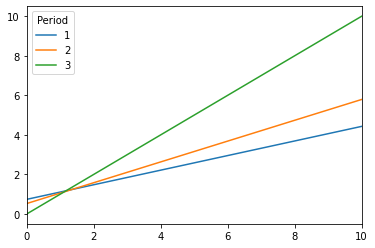

In [3]:
PFexample.DiscFac = 0.9
PFexample.solve()
PFexample.unpackcFunc()
print("Plot of Consumption Functions")
for T in range(3):
    x = np.linspace(0,10, 1000,endpoint=True)
    y = PFexample.cFunc[T+1](x)
    plt.plot(x,y, label = T+1)
plt.xlim([0, 10])
plt.legend(title='Period')
plt.show()

According to `quasi_hyperbolic_algebra`:

$$C_3=X_{3}$$

$$C_{2}=\frac{1}{1+\delta}X_{2}+\frac{1}{1+\delta}$$

$$C_{1}= \frac{1}{1+\delta+\delta^2}X_{1}+\frac{2}{1+\delta^2+\delta^3}$$

Checking if the slopes match the polynomial expressions:

In [4]:
print(PFexample.cFunc[3].derivative(1))
print(PFexample.cFunc[2].derivative(1))
print(PFexample.cFunc[1].derivative(1))

1.0
0.5263157894710575
0.36900369003328515


In [5]:
print(1/np.polyval([1],0.9))
print(1/np.polyval([1,1],0.9))
print(1/np.polyval([1,1,1],0.9))

1.0
0.5263157894736842
0.36900369003690037


They do.

#### Hyperbolic Case

We set a `hyperbolic` factor of 0.7 and assign the previous generated consumption functions as `geometric_solution`.

unpackcFunc is deprecated and it will soon be removed, please use unpack('cFunc') instead.


Plot of Consumption Functions


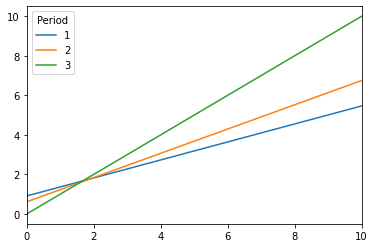

In [6]:
geom_solution = deepcopy(PFexample.solution)
PFexample_hyperbolic = deepcopy(PFexample)
PFexample_hyperbolic.geometric_solution = geom_solution
PFexample_hyperbolic.Hyperbolic_beta=0.7
PFexample_hyperbolic.solve()
PFexample_hyperbolic.unpackcFunc()
print("Plot of Consumption Functions")
for T in range(3):
    x = np.linspace(0,10, 1000,endpoint=True)
    y = PFexample_hyperbolic.cFunc[T+1](x)
    plt.plot(x,y, label = T+1)
plt.xlim([0, 10])
plt.legend(title='Period')
plt.show()

According to `quasi_hyperbolic_algebra`:

$$C_3=X_{3}$$

$$C_{2}=\frac{1}{1+\beta\delta}X_{2}+\frac{1}{1+\beta\delta}$$

$$C_{1}= \frac{1}{1+\beta\delta+\beta\delta^2}X_{1}+\frac{2}{1+\beta\delta^2+\beta\delta^3}$$

Checking if the slopes match the polynomial expressions:

In [7]:
print(PFexample_hyperbolic.cFunc[3].derivative(1))
print(PFexample_hyperbolic.cFunc[2].derivative(1))
print(PFexample_hyperbolic.cFunc[1].derivative(1))

1.0
0.6134969325043818
0.4551661356268127


In [8]:
print(1/np.polyval([1],0.9))
print(1/np.polyval([0.7,1],0.9))
print(1/np.polyval([0.7,0.7,1],0.9))

1.0
0.6134969325153374
0.4551661356395084


The same slopes are found.